# More influence plots of IBM/non-IBM users
Author :Daheng Wang  
Last modified: 2017-05-28

# Roadmap
1. Plot compound influences of IBM/non-IBM users
2. Plot weighted influences of IBM/non-IBM users

# Steps

In [1]:
"""
Initialization
"""

'''
Data analysis modules: pandas, matplotlib, numpy, and etc.
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # render double resolution plot output for Retina screens 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

'''
Standard modules, MongoDB modules
'''
import os, sys, json, datetime, pickle, multiprocessing, logging
from pprint import pprint

import pymongo
from pymongo import IndexModel, ASCENDING, DESCENDING

'''
Custom tool modules
'''
import mongodb  # module for setting up connection with (local) MongoDB database
import multiprocessing_workers  # module for splitting workloads between processes
import utilities  # module for various custom utility functions
from config import * # import all global configuration variables

'''
Misc
'''
NB_NAME = '20170506-influence_plot_2'

## Plot compound influences of IBM/non-IBM users

In [2]:
"""
Load pickled data of simple influence
"""
if 1 == 1:
    '''
    Read in simple_influence pickle
    '''
    df = pd.read_pickle(SIMPLE_INFLUENCE_PKL)
    
    # clean and preparations
    df = df.fillna(0)
    
    df = df.replace(to_replace=-1, value=0) # one data error with 'fo' = -1
    
    '''
    Load lists of IBM users
    '''
    user_nt_ibm_desc_ids_lst = []
    with open(USER_NT_IBM_DESC_IDS_LST_PKL, 'rb') as f:
        user_nt_ibm_desc_ids_lst = pickle.load(f)

    user_nt_ibm_tw_prop_1_ids_lst = []
    with open(USER_NT_IBM_TW_PROP_1_IDS_LST_PKL, 'rb') as f:
        user_nt_ibm_tw_prop_1_ids_lst = pickle.load(f)
    
    user_nt_ibm_tw_prop_2_ids_lst = []
    with open(USER_NT_IBM_TW_PROP_2_IDS_LST_PKL, 'rb') as f:
        user_nt_ibm_tw_prop_2_ids_lst = pickle.load(f) 

    user_nt_ibm_tw_prop_3_ids_lst = []
    with open(USER_NT_IBM_TW_PROP_3_IDS_LST_PKL, 'rb') as f:
        user_nt_ibm_tw_prop_3_ids_lst = pickle.load(f) 
    
    
    user_nt_ibm_desc_ids_set = set(user_nt_ibm_desc_ids_lst)
    user_nt_ibm_tw_prop_1_ids_set = set(user_nt_ibm_tw_prop_1_ids_lst)
    user_nt_ibm_tw_prop_2_ids_set = set(user_nt_ibm_tw_prop_2_ids_lst)
    user_nt_ibm_tw_prop_3_ids_set = set(user_nt_ibm_tw_prop_3_ids_lst)
    
    '''
    build dfs
    '''
    user_nt_ibm_desc_cond = df['uid'].isin(user_nt_ibm_desc_ids_set)
    df_user_nt_ibm_desc = df[user_nt_ibm_desc_cond]
    df_user_nt_nonibm_desc = df[~ user_nt_ibm_desc_cond]
    
    user_nt_ibm_tw_prop_1_cond = df['uid'].isin(user_nt_ibm_tw_prop_1_ids_set)
    df_user_nt_ibm_tw_prop_1 = df[user_nt_ibm_tw_prop_1_cond]
    df_user_nt_nonibm_tw_prop_1 = df[~ user_nt_ibm_tw_prop_1_cond]
    
    user_nt_ibm_tw_prop_2_cond = df['uid'].isin(user_nt_ibm_tw_prop_2_ids_set)
    df_user_nt_ibm_tw_prop_2 = df[user_nt_ibm_tw_prop_2_cond]
    df_user_nt_nonibm_tw_prop_2 = df[~ user_nt_ibm_tw_prop_2_cond]

    user_nt_ibm_tw_prop_3_cond = df['uid'].isin(user_nt_ibm_tw_prop_3_ids_set)
    df_user_nt_ibm_tw_prop_3 = df[user_nt_ibm_tw_prop_3_cond]
    df_user_nt_nonibm_tw_prop_3 = df[~ user_nt_ibm_tw_prop_3_cond]

    print('Done')

Done


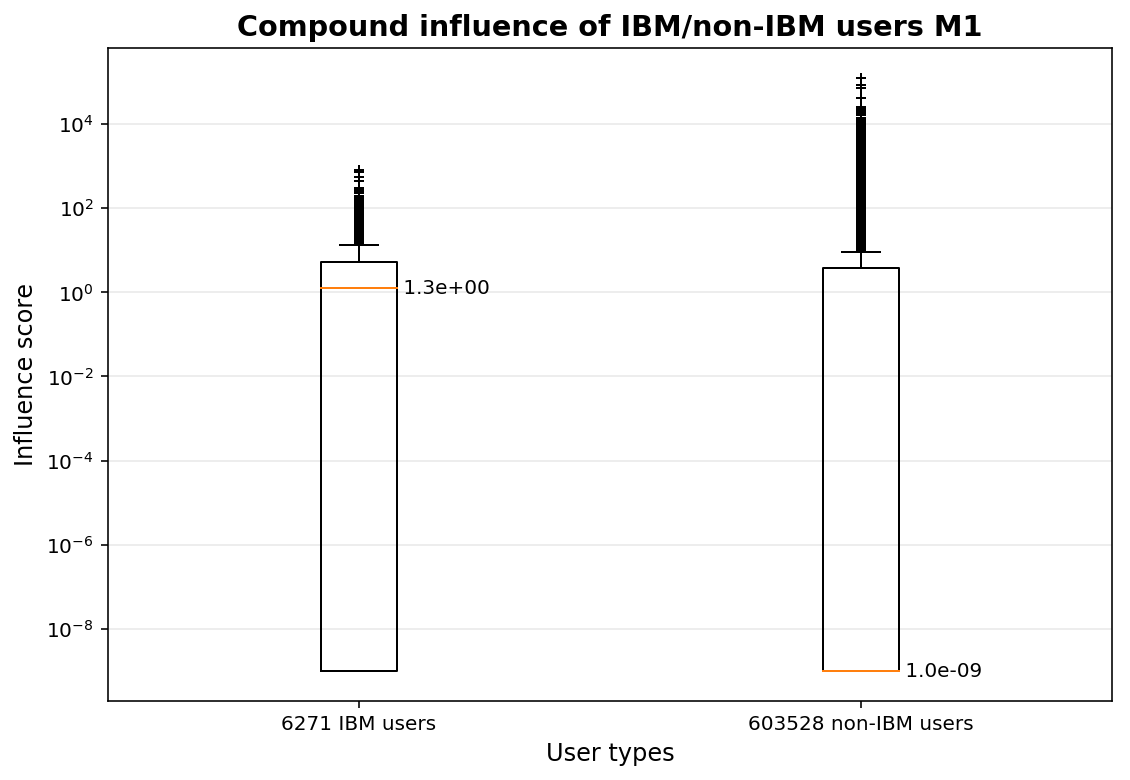

In [3]:
"""
Plot compound influence of IBM/non-IBM users of M!
"""

compound_influence_m1_fig = os.path.join(FIG_DIR, 'compound_influence_m1.png')

if 1 == 1:
    '''
    Prepare data
    '''
    # IBM users
    ibm_users_num = df_user_nt_ibm_desc.shape[0]
    
    m1_ibm_arc = df_user_nt_ibm_desc['n_src'] / df_user_nt_ibm_desc['n_n']

    m1_ibm_cleaned_fo = df_user_nt_ibm_desc['fo'].replace(to_replace=0, value=1)
    m1_ibm_compound_influence = m1_ibm_arc * np.log(m1_ibm_cleaned_fo)
    
    # non-IBM users
    nonibm_users_num = df_user_nt_nonibm_desc.shape[0]
    
    m1_nonibm_arc = df_user_nt_nonibm_desc['n_src'] / df_user_nt_nonibm_desc['n_n']
    m1_nonibm_cleaned_fo = df_user_nt_nonibm_desc['fo'].replace(to_replace=0, value=1) 
    m1_nonibm_compound_influence = m1_nonibm_arc * np.log(m1_nonibm_cleaned_fo)
    
    # limit the minimum influence value
    # otherwise, small enough influence value result in negative infinity in log scale
    m1_ibm_compound_influence[m1_ibm_compound_influence < 1e-9] = 1e-9
    m1_nonibm_compound_influence[m1_nonibm_compound_influence < 1e-9] = 1e-9

    data = [m1_ibm_compound_influence, m1_nonibm_compound_influence]
    
    '''
    Plot
    '''
    fig, ax = plt.subplots(figsize=(9, 6))
    
    bp = plt.boxplot(data, notch=False, sym='k+', vert=True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+', markersize=5)
    
    ax.set_xticklabels(['{} IBM users'.format(ibm_users_num), '{} non-IBM users'.format(nonibm_users_num)])
    title_fontdict = {'weight': 'bold', 'size': 'x-large'}
    ax.set_title('Compound influence of IBM/non-IBM users M1', fontdict=title_fontdict)
    
    label_fontdict = {'size': 'large'}
    ax.set_xlabel('User types', fontdict=label_fontdict)
    ax.set_ylabel('Influence score', fontdict=label_fontdict)
    ax.set_yscale('log')
    
    # add a horizontal grid to the plot, but make it very light in color
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    ax.set_axisbelow(True)
    
    # add median value text to the median line
    for line in bp['medians']:
        # get position data for median line
        x, y = line.get_xydata()[1] # right point of median line
        # overlay median value
        ax.text(x, y, '{:8.1e}'.format(y), horizontalalignment='left', verticalalignment='center')

    
    '''
    Save figure
    '''
    plt.savefig(compound_influence_m1_fig, dpi=200)

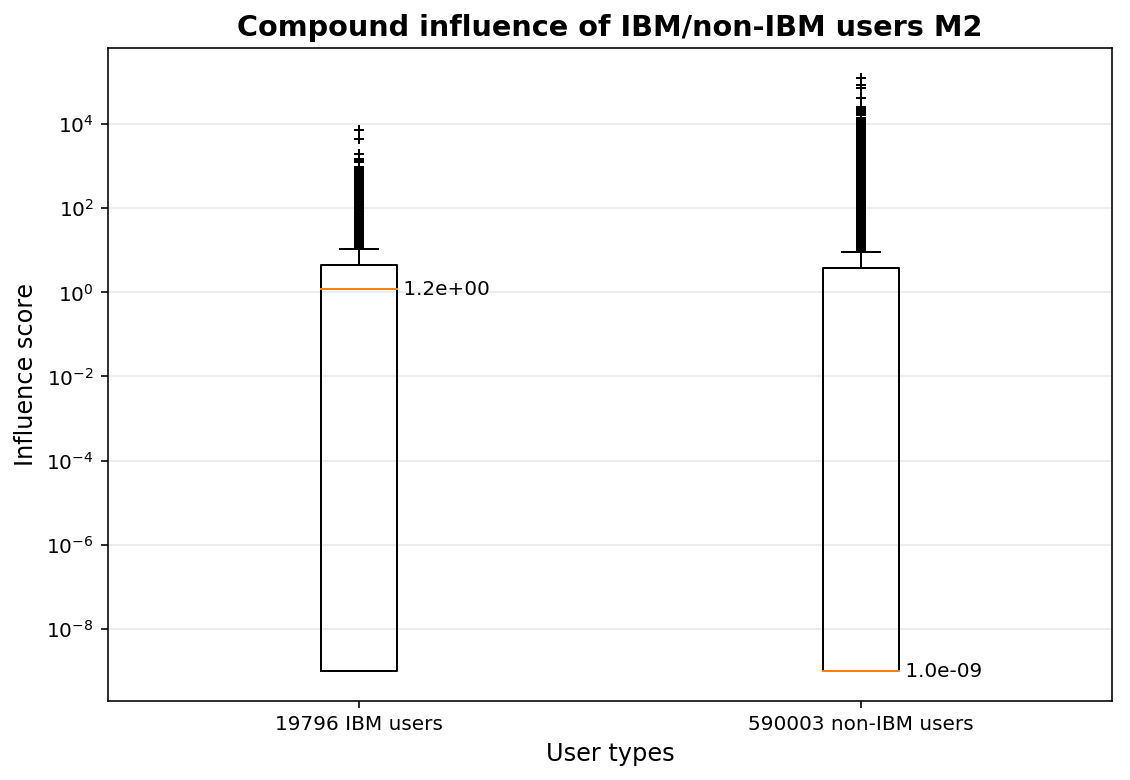

In [4]:
"""
Plot compound influence of IBM/non-IBM users of M2
"""

compound_influence_m2_fig = os.path.join(FIG_DIR, 'compound_influence_m2.png')

if 1 == 1:
    '''
    Prepare data
    '''
    # IBM users
    ibm_users_num = df_user_nt_ibm_tw_prop_2.shape[0]
    
    m2_ibm_arc = df_user_nt_ibm_tw_prop_2['n_src'] / df_user_nt_ibm_tw_prop_2['n_n']
    m2_ibm_cleaned_fo = df_user_nt_ibm_tw_prop_2['fo'].replace(to_replace=0, value=1)
    m2_ibm_compound_influence = m2_ibm_arc * np.log(m2_ibm_cleaned_fo)
    
    # non-IBM users
    nonibm_users_num = df_user_nt_nonibm_tw_prop_2.shape[0]
    
    m2_nonibm_arc = df_user_nt_nonibm_tw_prop_2['n_src'] / df_user_nt_nonibm_tw_prop_2['n_n']
    m2_nonibm_cleaned_fo = df_user_nt_nonibm_tw_prop_2['fo'].replace(to_replace=0, value=1)
    m2_nonibm_compound_influence = m2_nonibm_arc * np.log(m2_nonibm_cleaned_fo)
    
    # limit the minimum influence value
    # otherwise, small enough influence value result in negative infinity in log scale
    m2_ibm_compound_influence[m2_ibm_compound_influence < 1e-9] = 1e-9
    m2_nonibm_compound_influence[m2_nonibm_compound_influence < 1e-9] = 1e-9
    
    data = [m2_ibm_compound_influence, m2_nonibm_compound_influence]
    
    '''
    Plot
    '''
    fig, ax = plt.subplots(figsize=(9, 6))
    
    bp = plt.boxplot(data, notch=False, sym='k+', vert=True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+', markersize=5)
    
    ax.set_xticklabels(['{} IBM users'.format(ibm_users_num), '{} non-IBM users'.format(nonibm_users_num)])
    title_fontdict = {'weight': 'bold', 'size': 'x-large'}
    ax.set_title('Compound influence of IBM/non-IBM users M2', fontdict=title_fontdict)
    
    label_fontdict = {'size': 'large'}
    ax.set_xlabel('User types', fontdict=label_fontdict)
    ax.set_ylabel('Influence score', fontdict=label_fontdict)
    ax.set_yscale('log')
    
    # add a horizontal grid to the plot, but make it very light in color
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    ax.set_axisbelow(True)
    
    # add median value text to the median line
    for line in bp['medians']:
        # get position data for median line
        x, y = line.get_xydata()[1] # right point of median line
        # overlay median value
        ax.text(x, y, '{:8.1e}'.format(y), horizontalalignment='left', verticalalignment='center')

    '''
    Save figure
    '''
    plt.savefig(compound_influence_m2_fig, dpi=200)

## Plot weighted influences of IBM/non-IBM users

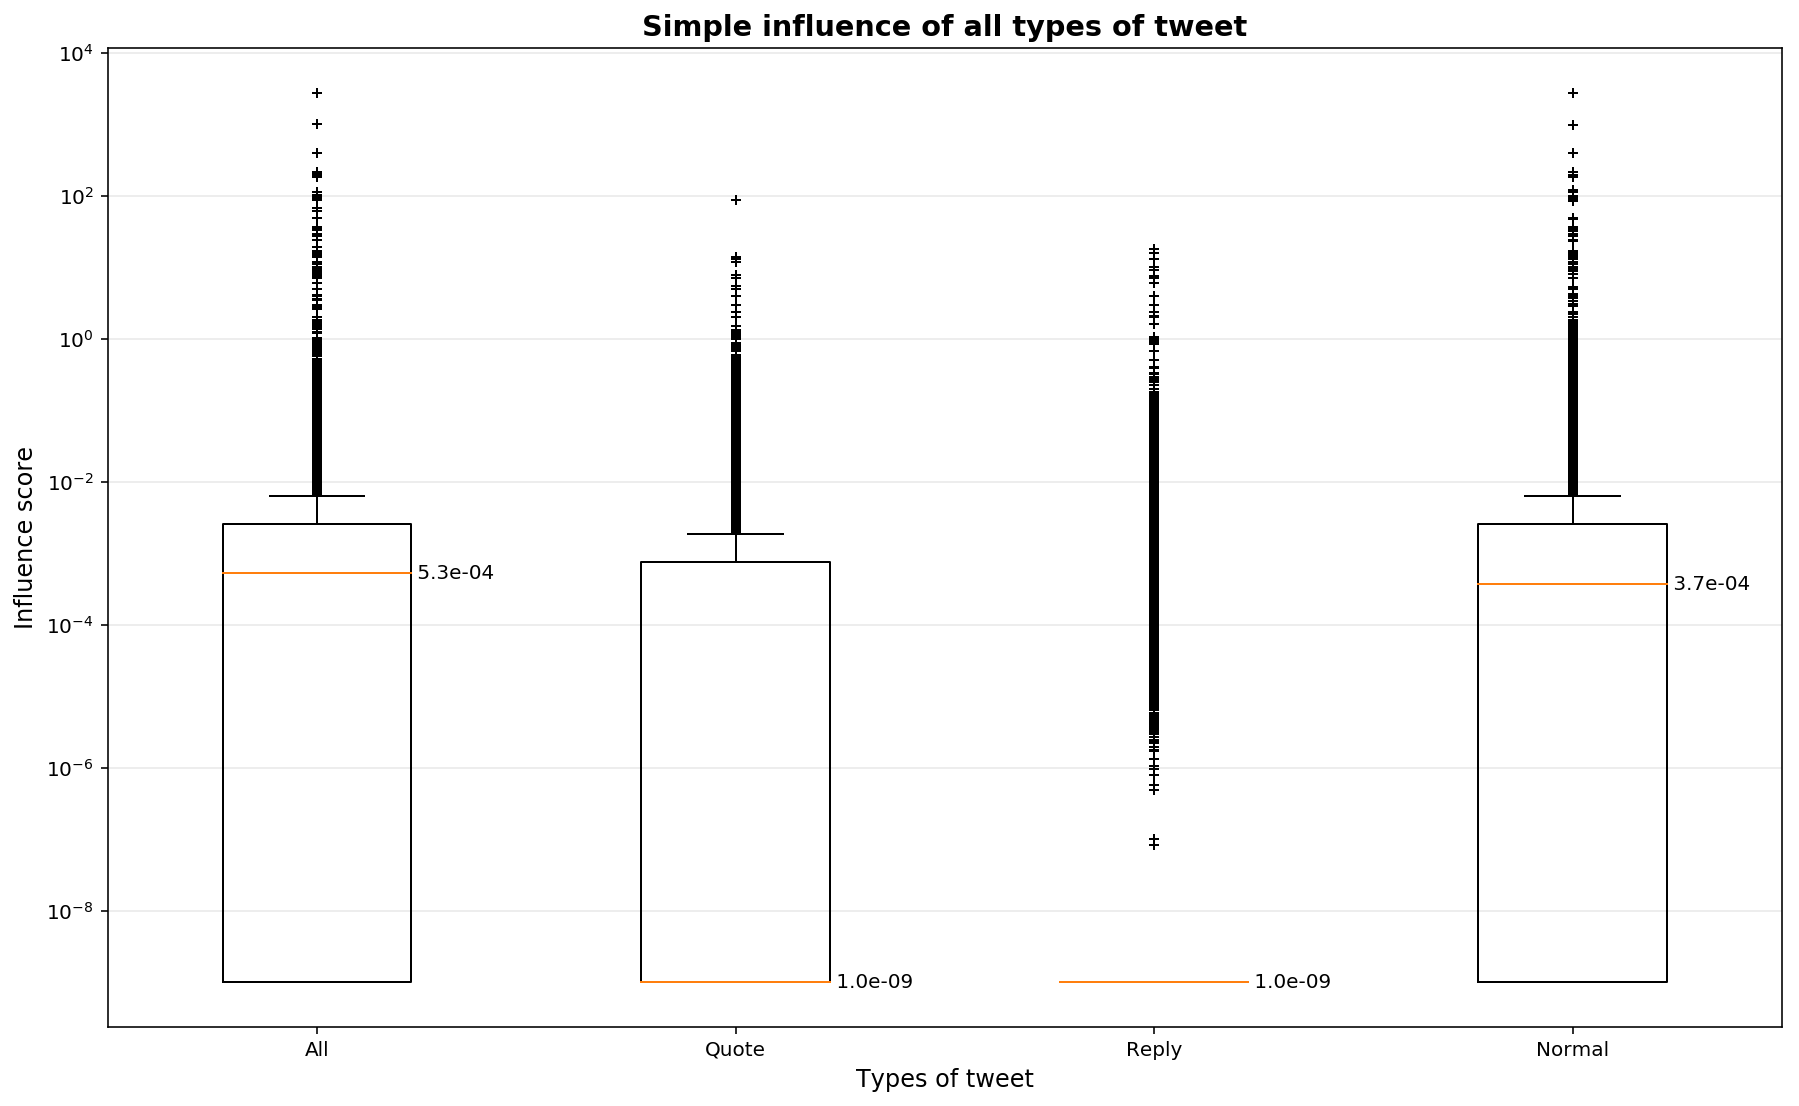

In [8]:
"""
Plot simple influence of all users by different types of tweets: native(all)/normal/quote/reply
"""

simple_influence_all_types_of_tweets_fig = os.path.join(FIG_DIR, 'simple_influence_all_types_of_tweets.png')

if 1 == 1:
    '''
    Prepare data
    '''
    df_tmp = df[((df['q_n'] >= 1) | (df['p_n'] >= 1)) & (df['nr_n'] >= 1)]
    
    n_norm_s = df_tmp['fo'] * df_tmp['n_n']
    n_norm_s = n_norm_s.replace(to_replace=0, value=1)
    n_influence = df_tmp['n_src'] / n_norm_s
    
    q_norm_s = df_tmp['fo'] * df_tmp['q_n']
    q_norm_s = q_norm_s.replace(to_replace=0, value=1)
    q_influence = df_tmp['q_src'] / q_norm_s
    
    p_norm_s = df_tmp['fo'] * df_tmp['p_n']
    p_norm_s = p_norm_s.replace(to_replace=0, value=1)
    p_influence = df_tmp['p_src'] / p_norm_s
    
    nr_norm_s = df_tmp['fo'] * df_tmp['nr_n']
    nr_norm_s = nr_norm_s.replace(to_replace=0, value=1)
    nr_influence = df_tmp['nr_src'] / nr_norm_s
    
    # limit the minimum influence value
    # otherwise, small enough influence value result in negative infinity in log scale
    n_influence[n_influence < 1e-9] = 1e-9
    q_influence[q_influence < 1e-9] = 1e-9
    p_influence[p_influence < 1e-9] = 1e-9
    nr_influence[nr_influence < 1e-9] = 1e-9

    data = [n_influence, q_influence, p_influence, nr_influence]
    
    '''
    Plot
    '''
    fig, ax = plt.subplots(figsize=(15, 9))
    
    bp = plt.boxplot(data, notch=False, sym='k+', vert=True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+', markersize=5)
    
    title_fontdict = {'weight': 'bold', 'size': 'x-large'}
    ax.set_title('Simple influence of all types of tweet', fontdict=title_fontdict)
    
    label_fontdict = {'size': 'large'}
    ax.set_xlabel('Types of tweet', fontdict=label_fontdict)
    ax.set_ylabel('Influence score', fontdict=label_fontdict)
    ax.set_xticklabels(['All', 'Quote', 'Reply', 'Normal'])
    ax.set_yscale('log')
    
    # add a horizontal grid to the plot, but make it very light in color
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    ax.set_axisbelow(True)
    
    # add median value text to the median line
    for line in bp['medians']:
        # get position data for median line
        x, y = line.get_xydata()[1] # right point of median line
        # overlay median value
        ax.text(x, y, '{:8.1e}'.format(y), horizontalalignment='left', verticalalignment='center')

    '''
    Save figure
    '''
    plt.savefig(simple_influence_all_types_of_tweets_fig, dpi=200)

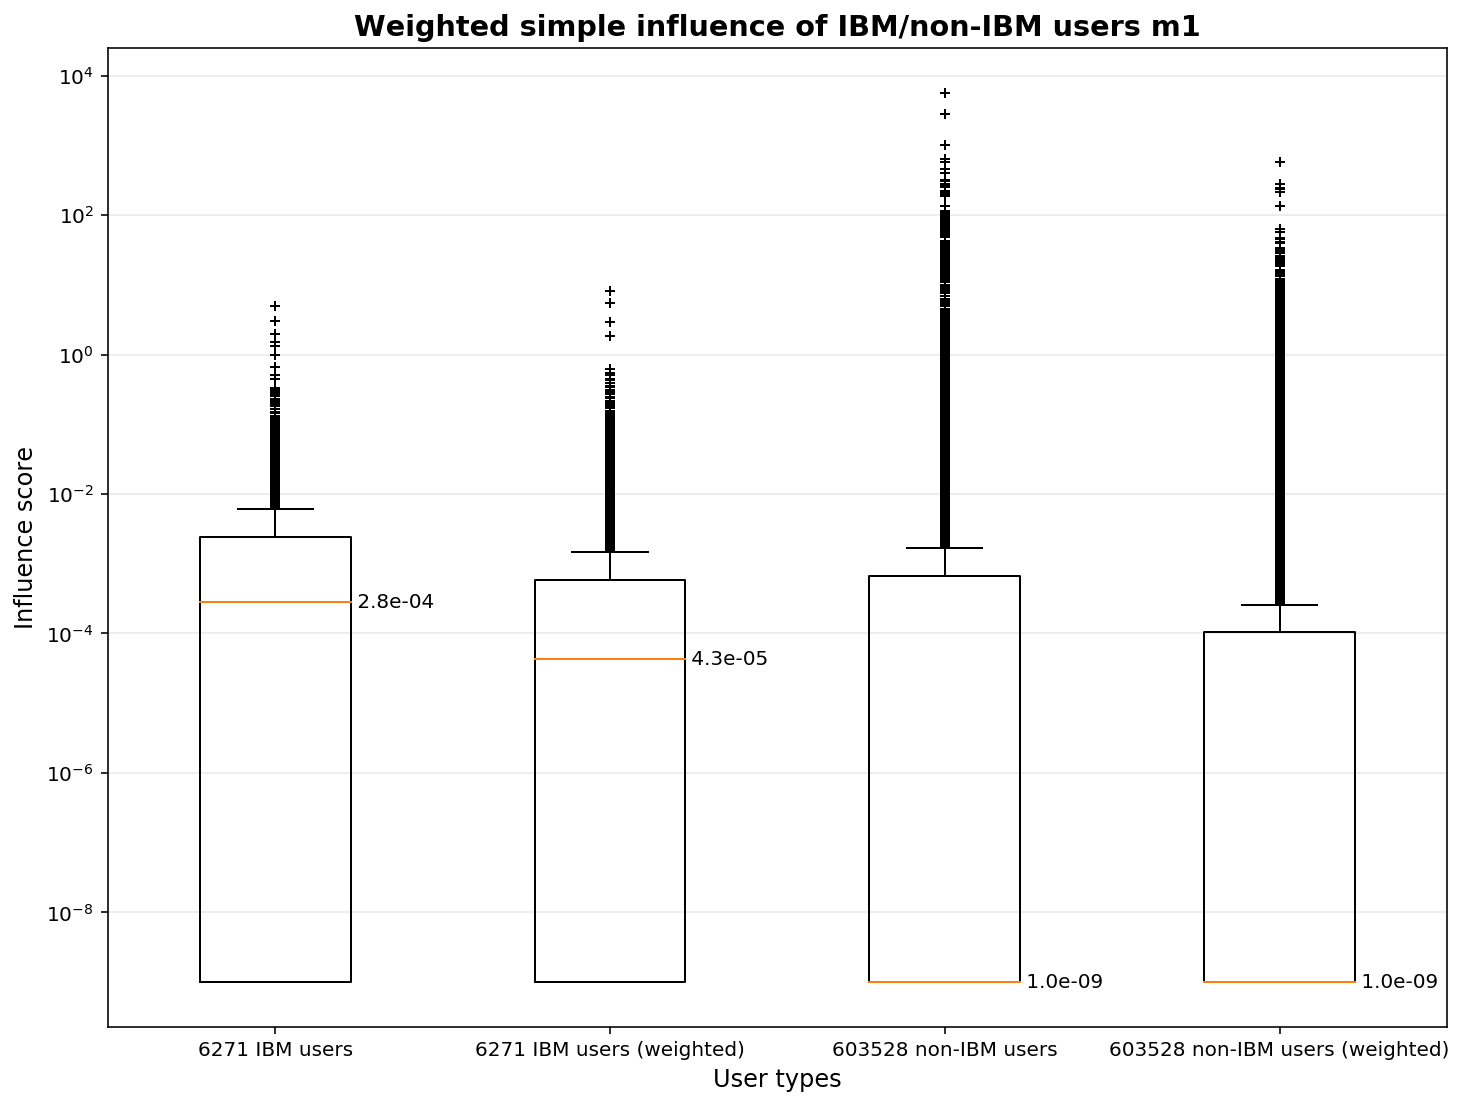

In [13]:
"""
Plot simple influence of IBM users from M1 by different types of tweets: native(all)/normal/quote/reply
"""

weighted_influence_m1_fig = os.path.join(FIG_DIR, 'weighted_influence_m1.png')

if 1 == 1:
    '''
    Prepare data
    '''
    p_w = 0.1
    q_w = 2.7
    nr_w = 0.1
    
    # IBM users
    ibm_users_num = df_user_nt_ibm_desc.shape[0]
    
    m1_ibm_n_norm_s = (df_user_nt_ibm_desc['fo'] * df_user_nt_ibm_desc['n_n']).replace(to_replace=0, value=1)
    m1_ibm_n_influence = (df_user_nt_ibm_desc['n_src'] / m1_ibm_n_norm_s)
        
    m1_ibm_q_norm_s = (df_user_nt_ibm_desc['fo'] * df_user_nt_ibm_desc['q_n']).replace(to_replace=0, value=1)
    m1_ibm_q_influence = df_user_nt_ibm_desc['q_src'] / m1_ibm_q_norm_s
    
    m1_ibm_p_norm_s = (df_user_nt_ibm_desc['fo'] * df_user_nt_ibm_desc['p_n']).replace(to_replace=0, value=1)
    m1_ibm_p_influence = df_user_nt_ibm_desc['p_src'] / m1_ibm_p_norm_s
    
    m1_ibm_nr_norm_s = (df_user_nt_ibm_desc['fo'] * df_user_nt_ibm_desc['nr_n']).replace(to_replace=0, value=1)
    m1_ibm_nr_influence = df_user_nt_ibm_desc['nr_src'] / m1_ibm_nr_norm_s
    
    m1_ibm_influence_weighted = \
        m1_ibm_q_influence * q_w + \
        m1_ibm_p_influence * p_w + \
        m1_ibm_nr_influence * nr_w
    
    # non-IBM users
    nonibm_users_num = df_user_nt_nonibm_desc.shape[0]
    
    m1_nonibm_n_norm_s = (df_user_nt_nonibm_desc['fo'] * df_user_nt_nonibm_desc['n_n']).replace(to_replace=0, value=1)
    m1_nonibm_n_influence = (df_user_nt_nonibm_desc['n_src'] / m1_nonibm_n_norm_s)
    
    m1_nonibm_q_norm_s = (df_user_nt_nonibm_desc['fo'] * df_user_nt_nonibm_desc['q_n']).replace(to_replace=0, value=1)
    m1_nonibm_q_influence = df_user_nt_nonibm_desc['q_src'] / m1_nonibm_q_norm_s
    
    m1_nonibm_p_norm_s = (df_user_nt_nonibm_desc['fo'] * df_user_nt_nonibm_desc['p_n']).replace(to_replace=0, value=1)
    m1_nonibm_p_influence = df_user_nt_nonibm_desc['p_src'] / m1_nonibm_p_norm_s
    
    m1_nonibm_nr_norm_s = (df_user_nt_nonibm_desc['fo'] * df_user_nt_nonibm_desc['nr_n']).replace(to_replace=0, value=1)
    m1_nonibm_nr_influence = df_user_nt_nonibm_desc['nr_src'] / m1_nonibm_nr_norm_s
    
    m1_nonibm_influence_weighted = \
        m1_nonibm_q_influence * q_w + \
        m1_nonibm_p_influence * p_w + \
        m1_nonibm_nr_influence * nr_w
        
    # limit the minimum influence value
    # otherwise, small enough influence value result in negative infinity in log scale
    m1_ibm_n_influence[m1_ibm_n_influence < 1e-9] = 1e-9
    m1_ibm_influence_weighted[m1_ibm_influence_weighted < 1e-9] = 1e-9
    m1_nonibm_n_influence[m1_nonibm_n_influence < 1e-9] = 1e-9
    m1_nonibm_influence_weighted[m1_nonibm_influence_weighted < 1e-9] = 1e-9

    data = [m1_ibm_n_influence,
            m1_ibm_influence_weighted,
            m1_nonibm_n_influence,
            m1_nonibm_influence_weighted
           ]
    
    '''
    Plot
    '''
    fig, ax = plt.subplots(figsize=(12, 9))
    
    bp = plt.boxplot(data, notch=False, sym='k+', vert=True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+', markersize=5)
    
    ax.set_xticklabels(['{} IBM users'.format(ibm_users_num),
                        '{} IBM users (weighted)'.format(ibm_users_num),
                        '{} non-IBM users'.format(nonibm_users_num),
                        '{} non-IBM users (weighted)'.format(nonibm_users_num)])
    title_fontdict = {'weight': 'bold', 'size': 'x-large'}
    ax.set_title('Weighted simple influence of IBM/non-IBM users m1', fontdict=title_fontdict)
    
    label_fontdict = {'size': 'large'}
    ax.set_xlabel('User types', fontdict=label_fontdict)
    ax.set_ylabel('Influence score', fontdict=label_fontdict)
    ax.set_yscale('log')
    
    # add a horizontal grid to the plot, but make it very light in color
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    ax.set_axisbelow(True)
    
    # add median value text to the median line
    for line in bp['medians']:
        # get position data for median line
        x, y = line.get_xydata()[1] # right point of median line
        # overlay median value
        ax.text(x, y, '{:8.1e}'.format(y), horizontalalignment='left', verticalalignment='center')

    
    '''
    Save figure
    '''
    plt.savefig(weighted_influence_m1_fig, dpi=200)